In [61]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

import klib as kb
import seaborn as sns
import missingno  as msno
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

# Trabalhando com a base de Macapá

- ### Vamos conhecer um pouco sobre a base de dados

In [20]:
df = pd.read_csv('macapa-2000-2020.csv', encoding='iso8859-1')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename( columns = {'chuva' : 'precipitacao'})
df.head()

,data,hora,temperatura,umidade,pressao,vel_vento,direcao_vento,nebulosidade,insolacao,temp_max,temp_min,precipitacao
0,2000-01-01,12.0,27.2,80.0,1006.8,1.0,32.0,10.0,6.854922,32.108248,24.0,0.000000
1,2000-01-01,18.0,29.6,64.0,1006.1,2.0,9.0,10.0,6.854922,32.108248,24.121414302836595,6.919249
2,2000-01-02,0.0,25.6,89.0,1005.6,0.0,0.0,10.0,7.200000,30.800000,24.121414302836595,6.919249
3,2000-01-02,12.0,25.2,90.0,1006.7,0.0,0.0,10.0,6.854922,32.108248,24.0,53.500000
4,2000-01-02,18.0,30.2,68.0,1004.3,2.0,5.0,6.0,6.854922,32.108248,24.121414302836595,6.919249


In [21]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23008 entries, 0 to 23007
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           22925 non-null  object 
 1   hora           22894 non-null  object 
 2   temperatura    22878 non-null  object 
 3   umidade        22875 non-null  float64
 4   pressao        22875 non-null  float64
 5   vel_vento      22875 non-null  float64
 6   direcao_vento  22875 non-null  float64
 7   nebulosidade   22875 non-null  float64
 8   insolacao      22875 non-null  float64
 9   temp_max       22875 non-null  float64
 10  temp_min       22875 non-null  object 
 11  precipitacao   22874 non-null  float64
dtypes: float64(8), object(4)
memory usage: 7.1 MB


In [19]:
# dimensão do dataframe
df.shape

(23008, 12)

# Verificar dados faltantes

<AxesSubplot:>

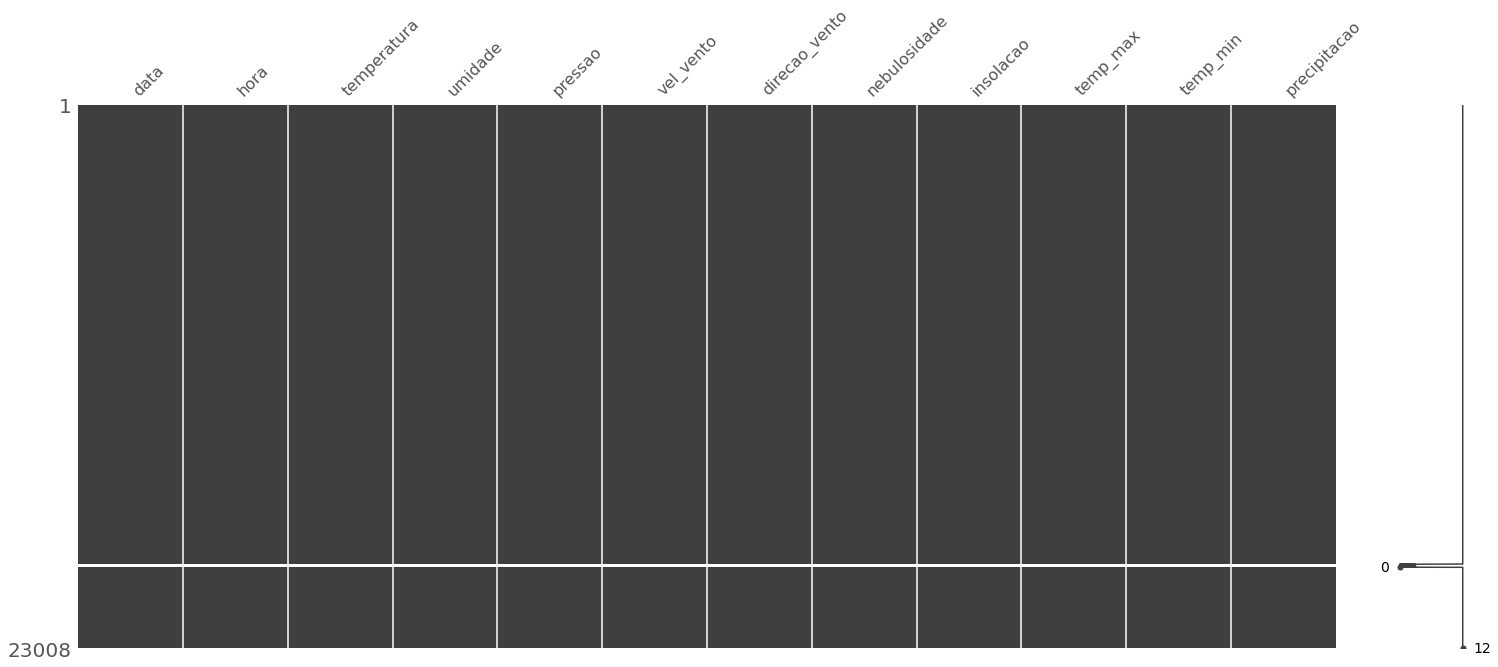

In [24]:
msno.matrix(df)

In [6]:
# Tabela de percentual de dados faltantes
def table_missing(df, size):
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100

    missing = pd.concat([total, percent], axis=1, join='outer', keys=['Total_faltantes', 'Percentual'])

    missing.index.name = 'Variaveis Numericas'
    
    return missing.head(size)

In [13]:
table_missing(df, len(df.columns))

,Total_faltantes,Percentual
Variaveis Numericas,,
chuva,134,0.582406
umidade,133,0.578060
pressao,133,0.578060
vel_vento,133,0.578060
direcao_vento,133,0.578060
nebulosidade,133,0.578060
insolacao,133,0.578060
temp_max,133,0.578060
temp_min,133,0.578060


# Caracteristicas Estatisticas do dataset

- Estatisticas Moveis e outras

In [23]:
df.describe()

,umidade,pressao,vel_vento,direcao_vento,nebulosidade,insolacao,temp_max,precipitacao
count,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,22874.000000
mean,78.265123,1009.516300,1.810646,8.465409,7.204854,6.849270,32.105022,6.934943
std,11.939128,1.873419,1.405251,10.582136,2.338093,1.819719,1.015759,8.126673
min,38.000000,996.100000,0.000000,0.000000,0.000000,0.000000,24.500000,0.000000
25%,70.000000,1008.200000,0.300000,2.000000,5.000000,6.854922,32.108248,6.919249
50%,79.000000,1009.505882,1.816484,5.000000,8.000000,6.854922,32.108248,6.919249
75%,88.000000,1010.800000,3.000000,9.000000,10.000000,6.854922,32.108248,6.919249
max,100.000000,1023.900000,9.200000,36.000000,10.000000,14.400000,39.100000,215.800000


- Variaveis numéricas

In [25]:
varNum = df.select_dtypes(include=[np.number])
varNum.columns

Index(['umidade', 'pressao', 'vel_vento', 'direcao_vento', 'nebulosidade',
       'insolacao', 'temp_max', 'precipitacao'],
      dtype='object')

- variaveis categoricas

In [26]:
varCat = df.select_dtypes(include=[np.object])
varCat.columns

Index(['data', 'hora', 'temperatura', 'temp_min'], dtype='object')

In [27]:
# resumindo
print(f'Total de Variaveis Numericas: {varNum.columns.value_counts().sum()}')
print(f'Total de Variaveis Categoricas: {varCat.columns.value_counts().sum()}')

Total de Variaveis Numericas: 8
Total de Variaveis Categoricas: 4


# Correlação

In [49]:
# matrix de correlação
kb.corr_mat(df) 

,umidade,pressao,vel_vento,direcao_vento,nebulosidade,insolacao,temp_max,precipitacao
umidade,1.00,0.42,-0.51,0.11,0.61,-0.20,-0.21,0.18
pressao,0.42,1.00,-0.24,0.10,0.07,0.01,-0.02,0.04
vel_vento,-0.51,-0.24,1.00,0.20,-0.39,0.20,0.20,-0.12
direcao_vento,0.11,0.10,0.20,1.00,0.05,-0.04,-0.03,-0.01
nebulosidade,0.61,0.07,-0.39,0.05,1.00,-0.25,-0.27,0.18
insolacao,-0.20,0.01,0.20,-0.04,-0.25,1.00,0.80,0.00
temp_max,-0.21,-0.02,0.20,-0.03,-0.27,0.80,1.00,0.00
precipitacao,0.18,0.04,-0.12,-0.01,0.18,0.00,0.00,1.00


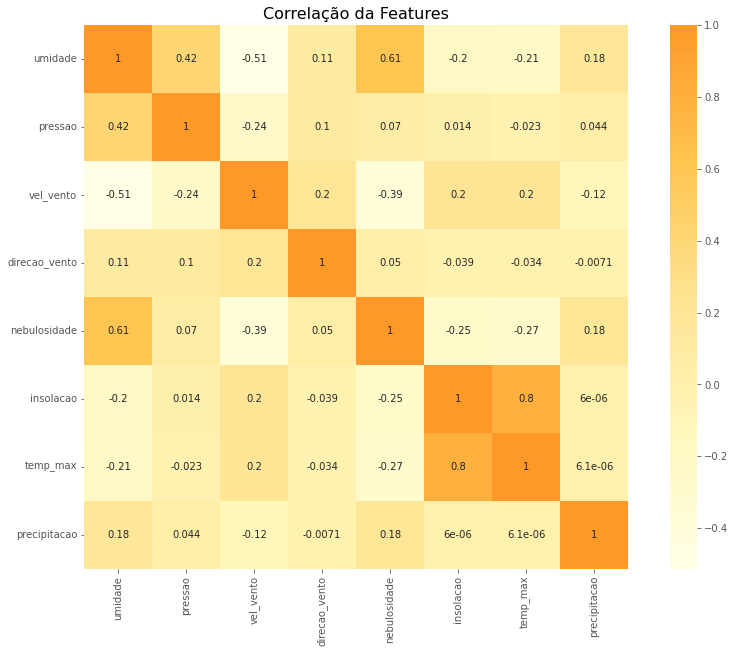

In [51]:
plt.subplots(figsize=(15, 10))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(df.corr(), center=True, square=True, annot=True, cmap="YlOrBr");

<AxesSubplot:title={'center':'Correlação da Features'}>

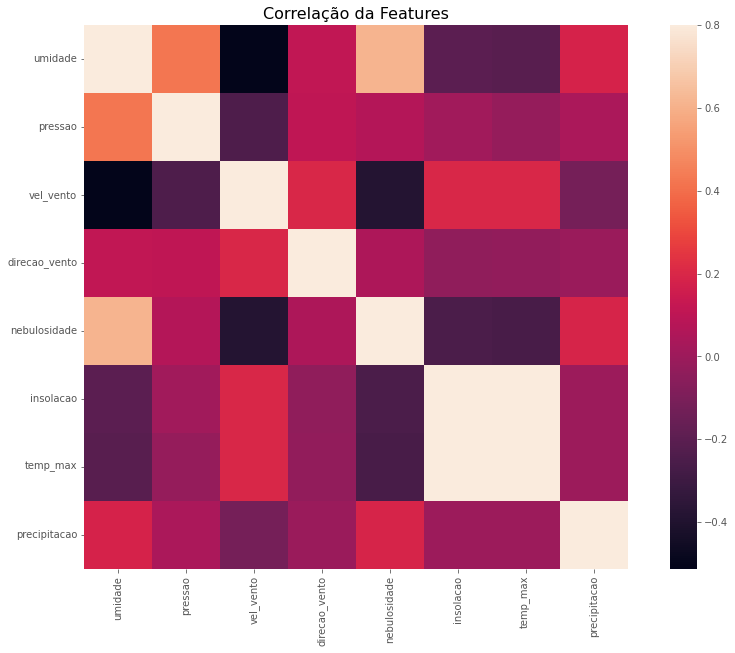

In [53]:
plt.subplots(figsize=(15, 10))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(df.corr(),square = True,  vmax=0.8)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

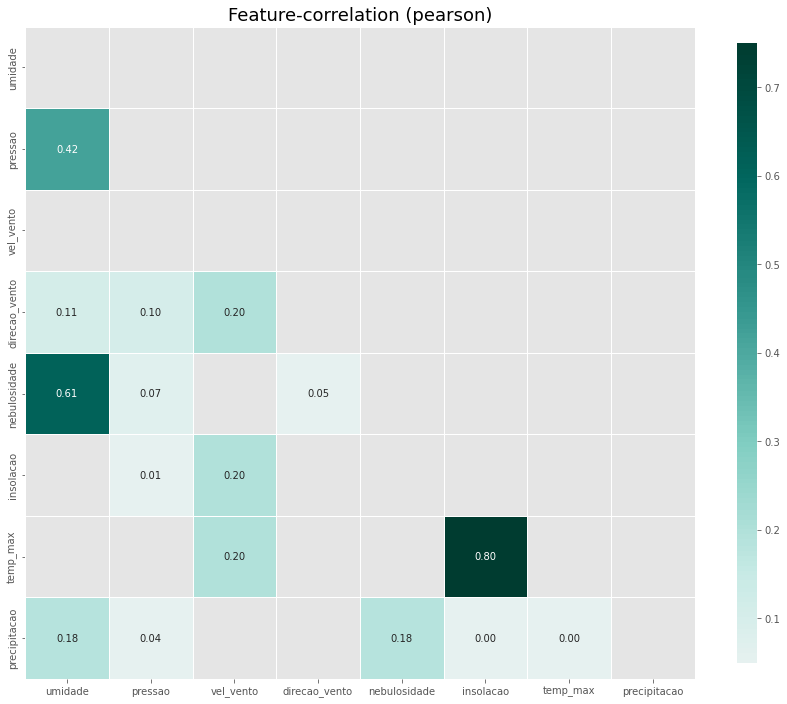

In [42]:
# correlações positivas
kb.corr_plot(df, split='pos',  figsize=(15,12))

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

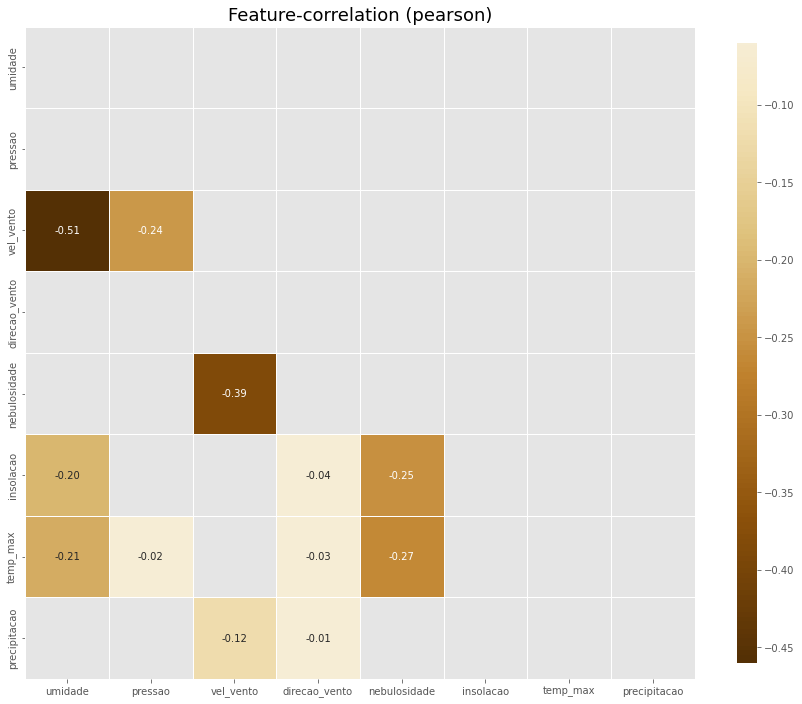

In [43]:
# correlações negativas
kb.corr_plot(df, split='neg', figsize=(15,12))

- ## HeatMap de Nulidade

Mede a correlação de nulidade: Quão fortemente a presença ou ausência de uma variável afeta a presença de outra:

### Legenda:

- A correlação de nulidade varia de -1 a 0
- correlação de nulidade varia de -1 (se uma variável parece a outra definitivamente não aparece) 
- Se for 0 (variáveis que aparecem ou não aparecem não têm efeito uma sobre a outra)
- Se for 1 (se uma variável aparece, a outra definitivamente também tem influencia sobre a outra)
- As entradas marcadas <1ou > -1 estão com uma correlação próxima de ser exatamente negativa ou 
  positiva. 

<AxesSubplot:>

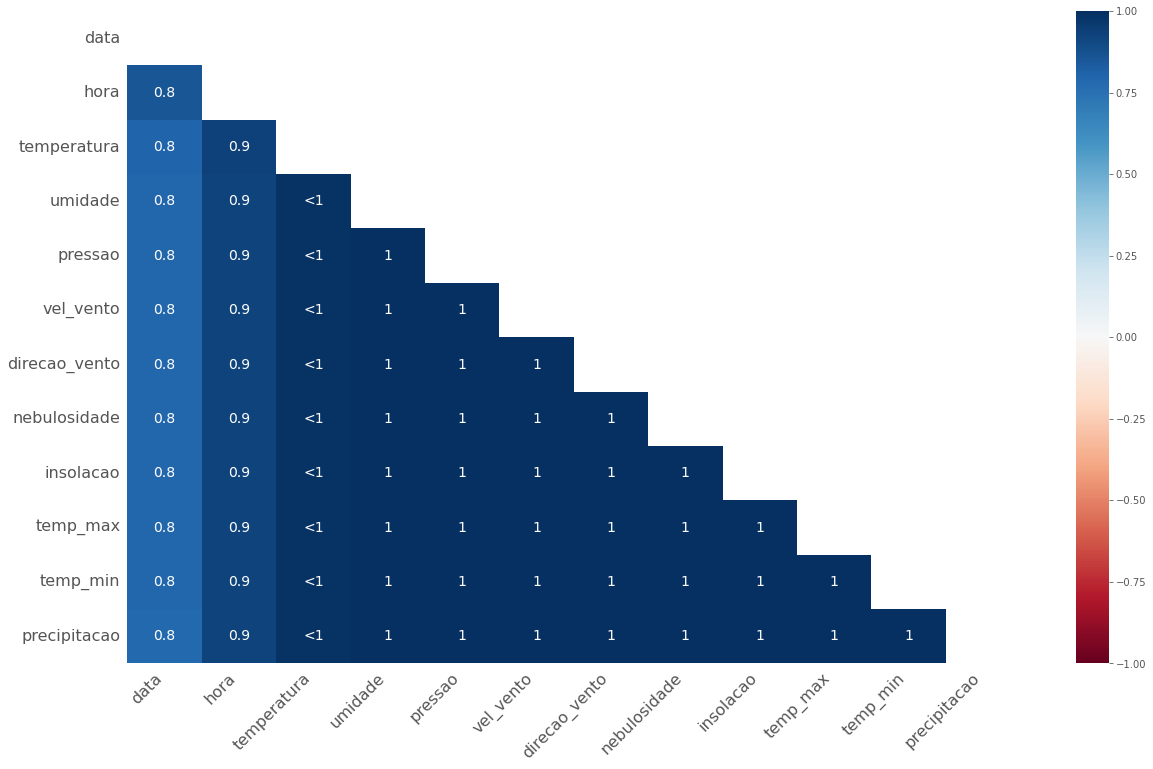

In [29]:
msno.heatmap(df)

- Dendograma

Permite correlacionar mais completamente a conclusão das variáveis, revelando tendências mais profundas do que as pares aos pares visíveis no mapa de calor da correlação:

<AxesSubplot:>

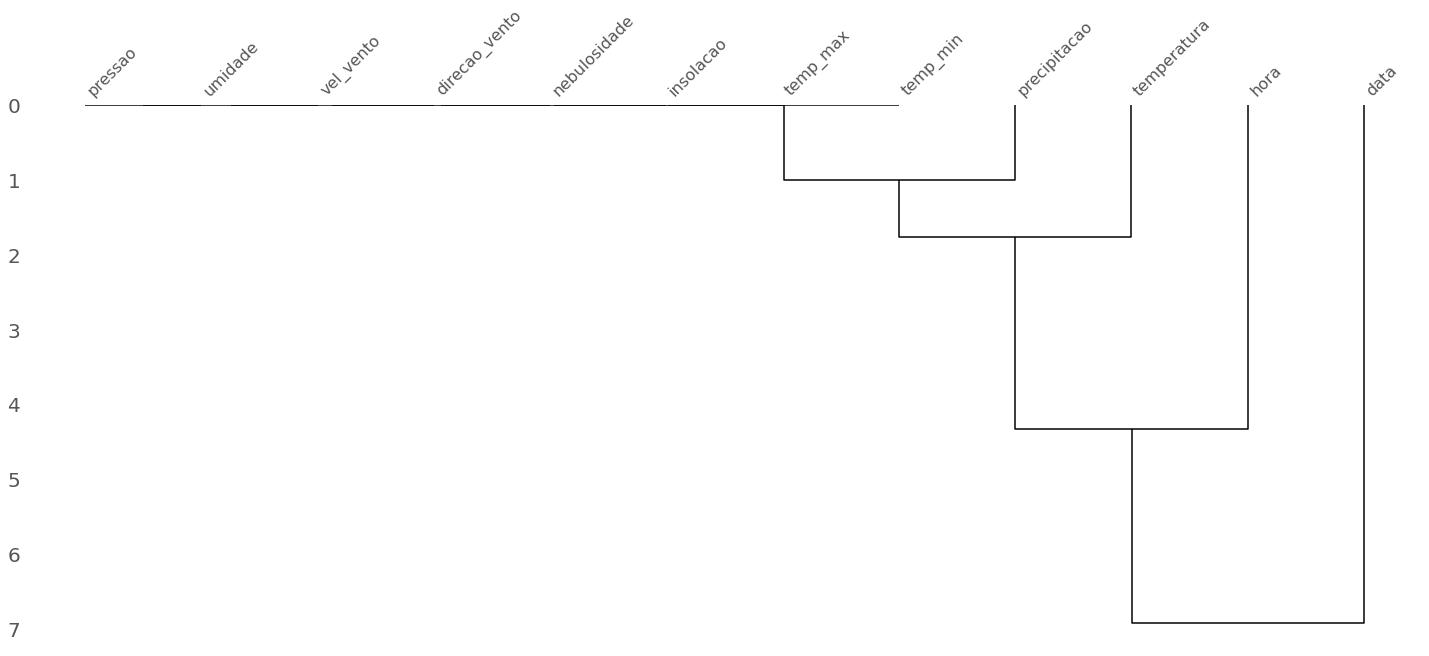

In [39]:
msno.dendrogram(df)

# Distribuição das features

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='precipitacao', ylabel='Density'>

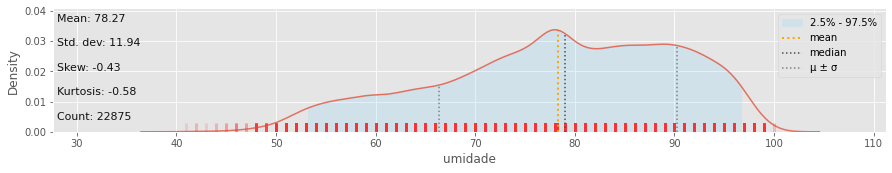

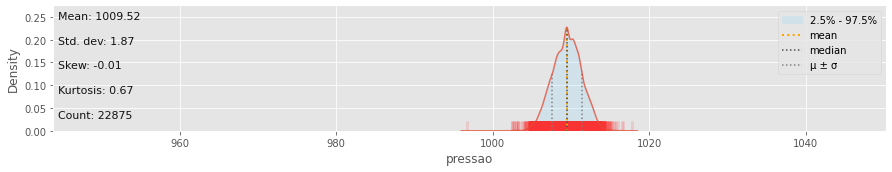

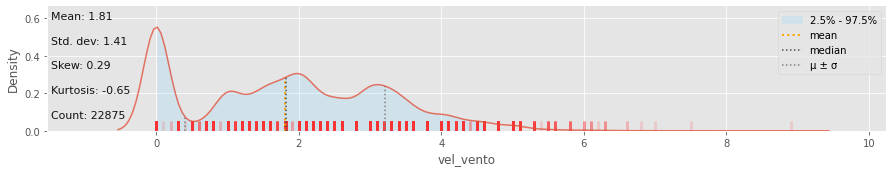

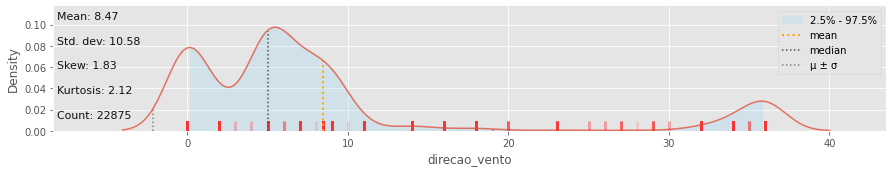

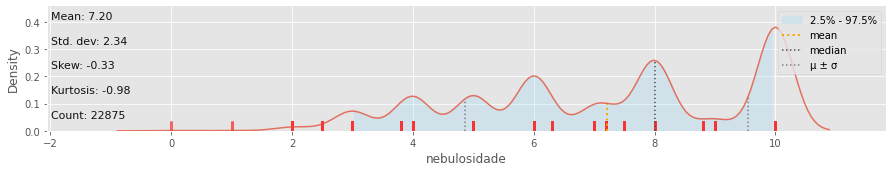

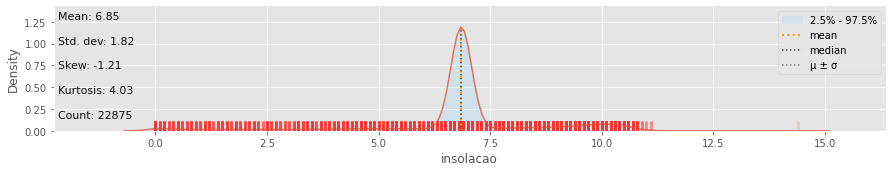

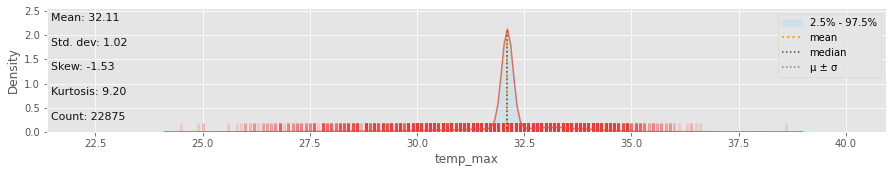

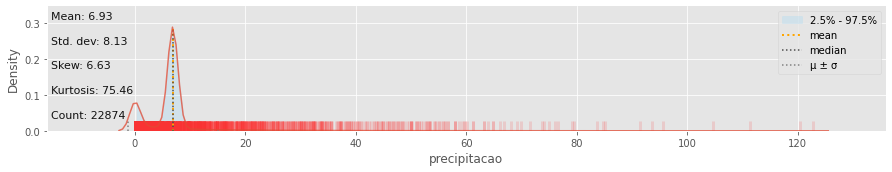

In [30]:
kb.dist_plot(df)

<AxesSubplot:>

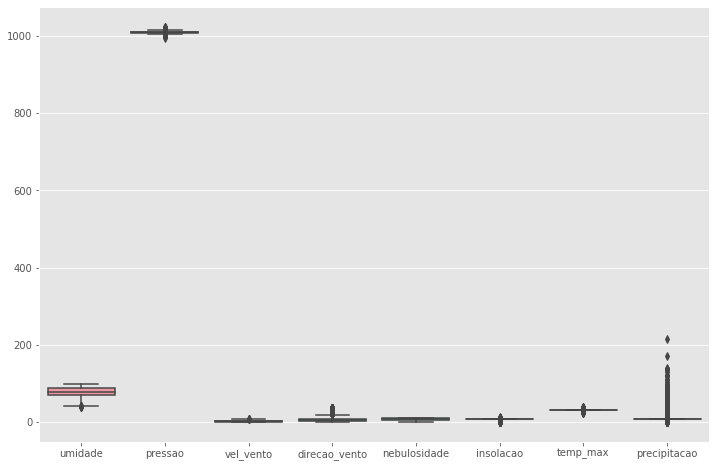

In [60]:
# temperatura
plt.subplots(figsize=(12, 8))

sns.boxplot(data=df)

# Estimando os valores de Skewness e Kurtose

In [31]:
# Estimando Skewness 
df.skew()

umidade         -0.433469
pressao         -0.005515
vel_vento        0.292138
direcao_vento    1.831809
nebulosidade    -0.328996
insolacao       -1.207541
temp_max        -1.534064
precipitacao     6.630569
dtype: float64

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

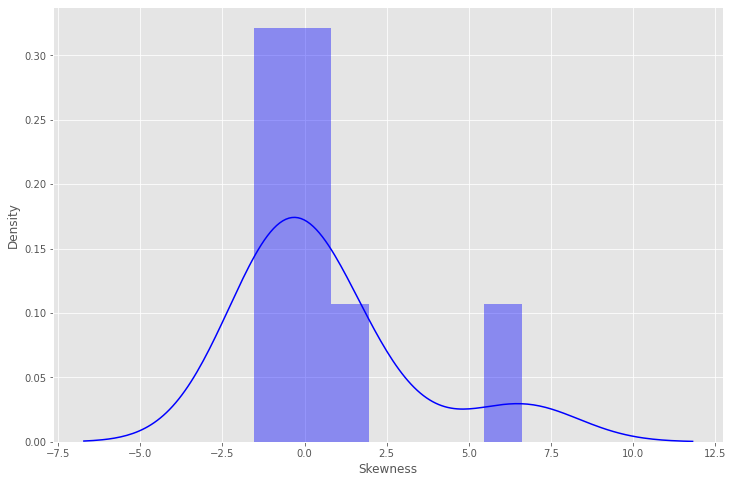

In [40]:
# grafico dos valores de Skewness do dataset
plt.figure(figsize = (12,8))
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

In [33]:
# Estimando Kurtose
df.kurt()

umidade          -0.580889
pressao           0.668761
vel_vento        -0.653741
direcao_vento     2.119572
nebulosidade     -0.977583
insolacao         4.036088
temp_max          9.201408
precipitacao     75.481495
dtype: float64

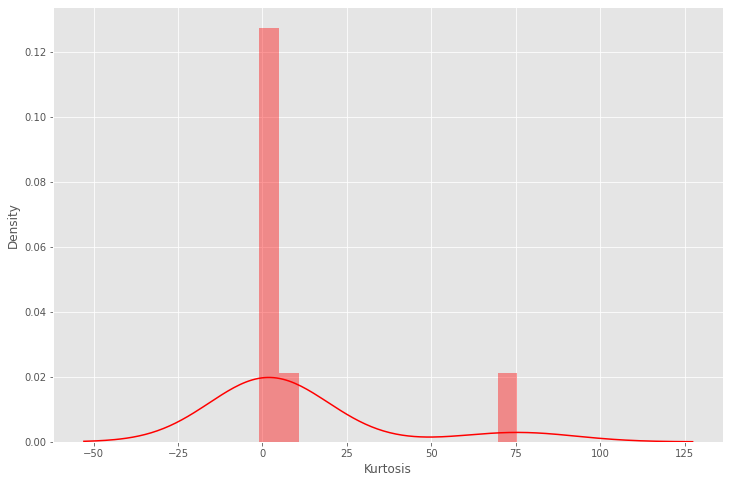

In [34]:
# Comparando a distribuição com e verificando sua Kurtose
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

# Testes de Hipotese
- Função para o teste de hipotese para normalidade

In [63]:
# função para seleção de features
def sample(dataframe, col_name, n=100, seed=42):
    np.random.seed(seed)    
    
    random_idx = np.random.choice(
        dataframe[col_name].dropna().index, 
        size=n, 
        replace=False
    )
    
    return dataframe.loc[random_idx, col_name]

### Shapiro-Wilk

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade. Nosso intuito é verificar se uma dada amostra veio ou não de uma distribuição normal.

Não precisamos e não entraremos nos detalhes da sua estatística de teste. Tudo que precisamos saber por ora é:

* A hipótese nula, $H_{0}$, é a normalidade dos dados e A hipotese Alternativa, $H_{a}$ é não normalidade
  * Se o valor-p for menor que o nível de significância $\alpha$, então temos evidências de que os dados não vêm de uma distribuição normal.
  * Se o valor-p for maior que $\alpha$, então não podemos afimar que os dados não vêm de uma distribuição normal (o que é sutilmente diferente de afirmar que eles _vêm_ de uma distribuição normal. Cuidado!).
* Apesar de ter tendência a melhores resultados quanto maior a amostra, a maior parte das implementações não suporta computações com amostras muito grandes.
  * A implementação do SciPy por exemplo só suporta até 5000 observações.
* É altamente aconselhado fazer o teste em conjunto com uma análise gráfica de um _q-q plot_.

In [77]:
def test_shapiro(dataframe, feature, n_sample):

    amostra = sample(dataframe, feature, n_sample) 
    test = st.shapiro(amostra)

    if test[1] < 0.01:
        print(f'\nP_value: {test[1]}')
        print(f'P_value { round(test[1], 3) } menor que Alpha = 0.05 \
              \nHA => Os dados de {feature} não vem de uma distribuição normal')
    else:
        print(f'\nP_value: {test[1]}')
        print(f'P_value { round(test[1], 3) } maior que Alpha = 0.05 \
              \nH0 => Os dados de {feature} vem de uma distribuição normal')

In [78]:
features = ['temperatura', 'umidade', 'pressao', 'vel_vento','direcao_vento',
            'nebulosidade', 'insolacao', 'temp_max', 'temp_min','precipitacao']


[test_shapiro(df, feature, 100) for feature in features]


P_value: 0.0009536921279504895
P_value 0.001 menor que Alpha = 0.05               
HA => Os dados de temperatura não vem de uma distribuição normal

P_value: 0.004905754700303078
P_value 0.005 menor que Alpha = 0.05               
HA => Os dados de umidade não vem de uma distribuição normal

P_value: 0.17760153114795685
P_value 0.178 maior que Alpha = 0.05               
H0 => Os dados de pressao vem de uma distribuição normal

P_value: 0.0008799751522019506
P_value 0.001 menor que Alpha = 0.05               
HA => Os dados de vel_vento não vem de uma distribuição normal

P_value: 7.761152831520235e-12
P_value 0.0 menor que Alpha = 0.05               
HA => Os dados de direcao_vento não vem de uma distribuição normal

P_value: 2.386892106187588e-07
P_value 0.0 menor que Alpha = 0.05               
HA => Os dados de nebulosidade não vem de uma distribuição normal

P_value: 2.0888233634094866e-13
P_value 0.0 menor que Alpha = 0.05               
HA => Os dados de insolacao não vem de um

[None, None, None, None, None, None, None, None, None, None]